In [258]:
#The task here is to predict the quality of red wine on a scale of 0–10 based on set of features as inputs.

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Read the data using pandas into a dataframe df
df = pd.read_csv("./winequality-red.csv")

In [260]:
#Input Features
#fixed acidity: most acids involved with wine or fixed or nonvolatile
#volatile acidity: the amount of acetic acid in wine
#citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
#residual sugar: the amount of sugar remaining after fermentation stops
#chlorides: the amount of salt in the wine
#free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
#total sulfur dioxide: amount of free and bound forms of S02
#density: the density of water is close to that of water depending on the percent alcohol and sugar content
#pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
#sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
#alcohol: the percent alcohol content of the wine.

#Output Variable:

#quality: output variable (based on sensory data, score between 0 and 10)


In [261]:
df.info()
# all the data is having numerical values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [262]:
df.isnull().sum()
#There are no null values in dataset. It's pretty clean dataset. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [263]:
df.head(3)
#Shows top three rows of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


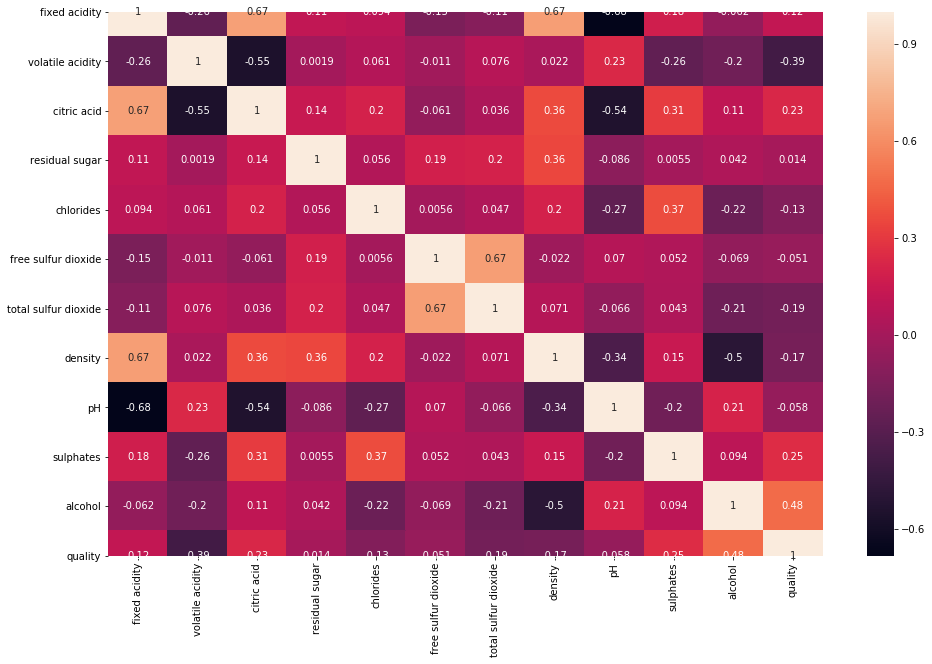

In [264]:
# adjust the width and height of the figure
plt.figure(figsize=(16,10))
# create a heatmap of correlation matrix
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [265]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)
#It is best practise to check which features are more correlated with the target variable. 
#The model will give more reliable output when we pass significant features into the model.

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [266]:
# These are top five features with highest correlation with quality:
#alcohol
#Volatile acidity
#sulphates
#citric acid

In [267]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


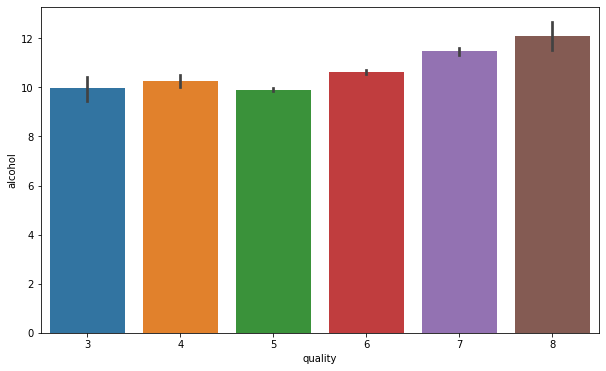

In [268]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data= df)

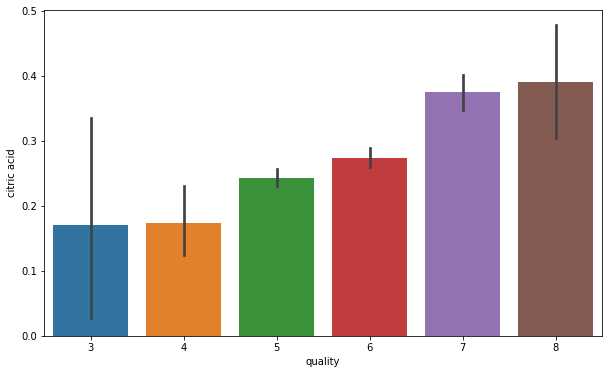

In [269]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data= df)

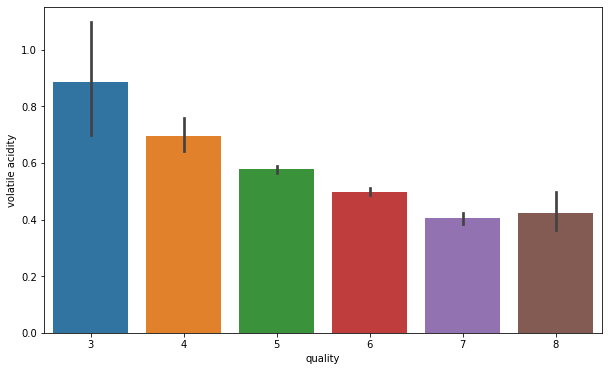

In [270]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data= df)

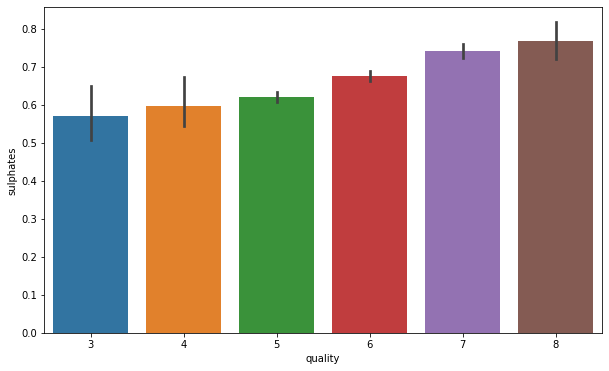

In [271]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data= df)

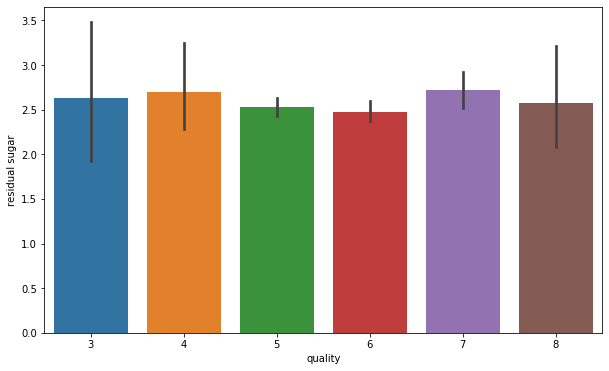

In [272]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data= df)

In [273]:
# Residual Sugar has correlation less that 0.05 with quality. 

In [274]:

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_wine_plots


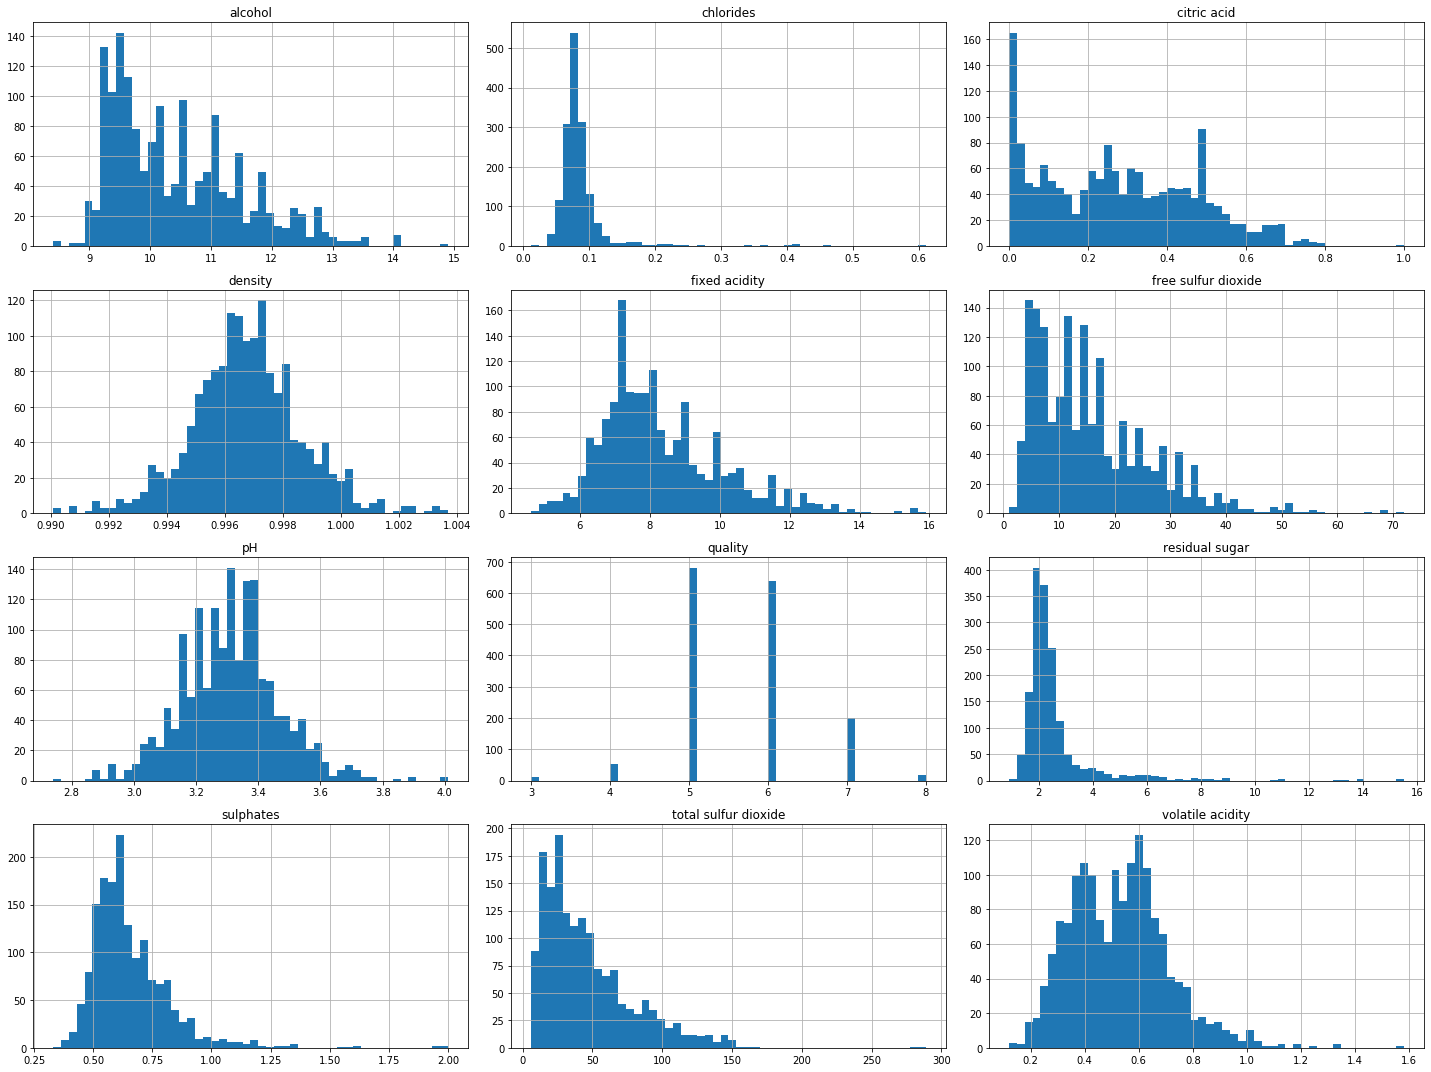

In [275]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_wine_plots")
plt.show()

In [276]:
X = df.drop(['quality'], axis =1).values
y = df['quality'].values.reshape(-1,1)

In [277]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 4)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1279, 11)
Shape of y_train:  (1279, 1)
Shape of x_test:  (320, 11)
Shape of y_test:  (320, 1)


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(X_train)
test_x_scaled = scaler.transform(X_test)

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [280]:
def linear_regression():
    linear_regression = LinearRegression()
    linear_regression.fit(train_x_scaled, y_train)
    y_test_pred = linear_regression.predict(test_x_scaled)
    print("Linear Regression:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [281]:

def svr():
    svr = SVR(C=3, kernel='rbf')
    svr.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = svr.predict(test_x_scaled)
    print("SVR Regression:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [287]:
from sklearn import metrics 
def random_forest():
    rf = RandomForestRegressor()
    rf.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = rf.predict(test_x_scaled)
    print("Random Forest:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [288]:
linear_regression()
svr()
random_forest()

Linear Regression:
Mean Absolute Error Test: 0.5
Root Mean Squared Error Test: 0.65
SVR Regression:
Mean Absolute Error Test: 0.44
Root Mean Squared Error Test: 0.58
Random Forest:
Mean Absolute Error Test: 0.42
Root Mean Squared Error Test: 0.57


/home/snehal/anaconda3/envs/my_env7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [289]:
#Regression models can be validated using Mean Absolute Error(MAE). 
#The less the mae value the better the model works. From above results we can decide that 
#Random Forest model works better than other models for our data.

In [290]:
#Hyperparameter Tuning for Random Forest.
#Below am going to find the parameter n_estimator, to tune the model for better result. 

In [291]:
estimators = range(100,250,10)
rfr = {}
for i in estimators:
    rf = RandomForestRegressor(n_estimators=i,max_depth=None, max_features = 'auto')
    rf.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = rf.predict(test_x_scaled)
    print("RF for Estimator :",i)
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))
    mae = (round(mean_absolute_error(y_test, y_test_pred),2))
    rfr[i]= mae

RF for Estimator : 100
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 110
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.54
RF for Estimator : 120
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 130
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 140
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 150
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 160
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 170
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 180
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 190
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 200
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 210
Me

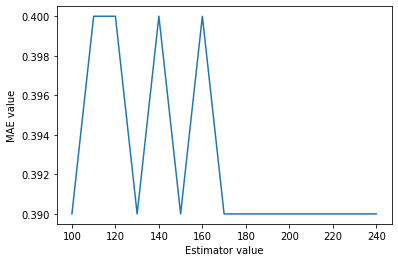

In [292]:
plt.plot(list(rfr.keys()),list(rfr.values()))
plt.xlabel("Estimator value")
plt.ylabel("MAE value")
plt.show()

In [293]:
X = df.drop(['quality'], axis =1).values
y = df['quality'].values.reshape(-1,1)

In [294]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 4)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", X_test.shape)
print("Shape of x_test: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1279, 11)
Shape of y_train:  (320, 11)
Shape of x_test:  (1279, 1)
Shape of y_test:  (320, 1)


In [295]:
from sklearn.ensemble import RandomForestRegressor
#rfr = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 240,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [296]:
#Random Search Cross Validation

In [297]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [80, 120, 140, 160, 180, 190, 200, 220, 240, 260]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [80, 120, 140, 160, 180, 190, 200, 220, 240, 260]}

In [298]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

In [299]:
rf = RandomForestRegressor()

In [304]:
# Fit the random search model
#Random Search Training
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [306]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [307]:
#Evaluating Random Search

#To determine if random search yielded a better model,
#I am comparing the base model with the best random search model.

In [308]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, predictions),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, predictions)),2))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 85.47%.
Mean Absolute Error Test: 0.42
Root Mean Squared Error Test: 0.58


/home/snehal/anaconda3/envs/my_env7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [309]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 85.71%.
Mean Absolute Error Test: 0.37
Root Mean Squared Error Test: 0.53


In [310]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.28%.
